In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import time
import scipy.stats
import pandas as pd
import random

## Simulate from Class

In [2]:
x = np.genfromtxt('data/input.csv', delimiter=',')
x.shape

(20000, 9)

In [3]:
simulation = np.genfromtxt('data/output.csv', delimiter=',')
simulation.shape

(20000,)

In [4]:
y = simulation

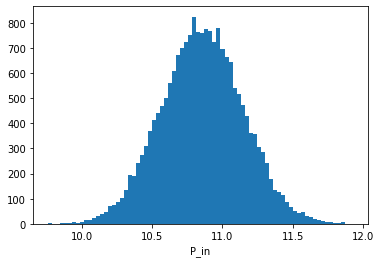

In [5]:
# Plot historgram
plt.hist(simulation, bins = 'auto')
plt.xlabel('P_in')
plt.show()

In [6]:
# Tolerances of electronic components
# Used to initialize the class
from PSU_class import PSU

Vout = np.array([3.2, 3.3, 3.4])
LS_Ron = np.array([6.3, 8.3, 11])*1e-3
Iout = np.array([2.64, 3.03, 3.45])
Vin = np.array([13.3, 13.35, 13.37])
Fsw = np.array([430, 455, 489])*1e3
Vbody_diode = np.array([0.65, 0.8, 1.2])
L = np.array([5.4, 4.5, 3.6])*1e-6
DCR = np.array([12.61, 19, 27.23])*1e-3
P_IC = np.array([83.93, 88.81, 93.69])*1e-3

model = PSU(Vout, LS_Ron, Iout, Vin, Fsw, Vbody_diode, L, DCR, P_IC)

limit_min = model.P_in()[0]
limit_MAX = model.P_in()[2]
limit_nom = model.P_in()[1]

## Model Selection Methods

### Chi-Square

In [7]:
from helper_functions import compute_chi_square

results = compute_chi_square(simulation)

Distribution: weibull_min || Parameters: (4.209823302146594, 9.752128013554469, 1.2126126763129437)
Distribution: norm || Parameters: (10.855754143885084, 0.289212270506663)
Distribution: weibull_max || Parameters: (4.165789169745157, 11.944527058417233, 1.197107615621026)
Distribution: beta || Parameters: (1382.2562704618335, 2140.0620851779486, -2.940879469826651, 35.157109414961276)
Distribution: invgauss || Parameters: (0.014824681595628057, 8.417802033380093, 164.2301758633106)
Distribution: uniform || Parameters: (9.763923621594225, 2.1602092690086625)
Distribution: gamma || Parameters: (18158.834821631688, -28.11696932776931, 0.002146212788737483)
Distribution: expon || Parameters: (9.763923621594225, 1.0918305222908593)
Distribution: lognorm || Parameters: (0.012696297372284948, -11.91493143058753, 22.768545993004153)
Distribution: pearson3 || Parameters: (0.8092113114970197, 10.898386520782875, 0.4594465725723764)
Distribution: triang || Parameters: (0.508571469294267, 9.76375

In [8]:
results
results.to_csv('Data/MLE_table.csv',header=None, index=None)

In [9]:
results

,Distribution,Log_likelihood,Chi_square,Parameters
1,norm,-3566.883455,0.376370,"(10.855754143885084, 0.289212270506663)"
3,beta,-3566.513365,0.655257,"(1382.2562704618335, 2140.0620851779486, -2.94..."
6,gamma,-3566.515747,0.664149,"(18158.834821631688, -28.11696932776931, 0.002..."
8,lognorm,-3567.430566,2.107927,"(0.012696297372284948, -11.91493143058753, 22...."
2,weibull_max,-3648.776199,41.664111,"(4.165789169745157, 11.944527058417233, 1.1971..."
0,weibull_min,-3667.089562,60.625129,"(4.209823302146594, 9.752128013554469, 1.21261..."
4,invgauss,-3776.837869,159.350134,"(0.014824681595628057, 8.417802033380093, 164...."
9,pearson3,-6528.510339,3397.475456,"(0.8092113114970197, 10.898386520782875, 0.459..."
10,triang,-6916.007006,4957.499939,"(0.508571469294267, 9.76375419579111, 2.160549..."
5,uniform,-15404.102016,18558.509312,"(9.763923621594225, 2.1602092690086625)"


In [10]:
results_test = results.drop(results.index[3])
results_test

,Distribution,Log_likelihood,Chi_square,Parameters
1,norm,-3566.883455,0.376370,"(10.855754143885084, 0.289212270506663)"
3,beta,-3566.513365,0.655257,"(1382.2562704618335, 2140.0620851779486, -2.94..."
6,gamma,-3566.515747,0.664149,"(18158.834821631688, -28.11696932776931, 0.002..."
2,weibull_max,-3648.776199,41.664111,"(4.165789169745157, 11.944527058417233, 1.1971..."
0,weibull_min,-3667.089562,60.625129,"(4.209823302146594, 9.752128013554469, 1.21261..."
4,invgauss,-3776.837869,159.350134,"(0.014824681595628057, 8.417802033380093, 164...."
9,pearson3,-6528.510339,3397.475456,"(0.8092113114970197, 10.898386520782875, 0.459..."
10,triang,-6916.007006,4957.499939,"(0.508571469294267, 9.76375419579111, 2.160549..."
5,uniform,-15404.102016,18558.509312,"(9.763923621594225, 2.1602092690086625)"
7,expon,-21757.113318,50125.223139,"(9.763923621594225, 1.0918305222908593)"


### Plots

In [11]:
import seaborn as sns
simulation.sort()

In [12]:
params_gamma = results.iloc[2]['Parameters']
params_beta = results.iloc[1]['Parameters']
params_normal = results.iloc[0]['Parameters']
params_uniform = results.iloc[9]['Parameters']
params_lognorm = results.iloc[3]['Parameters']

In [13]:
params_expon = results.iloc[10]['Parameters']
params_expon

(9.763923621594225, 1.0918305222908593)

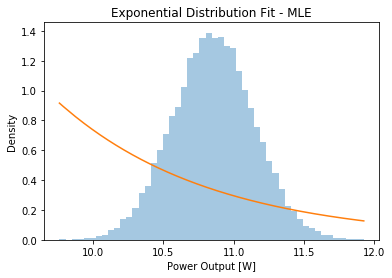

In [14]:
expon_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.expon.pdf(simulation, *params_expon))
expon_fit.set_title('Exponential Distribution Fit - MLE')
expon_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_expon.png')

In [15]:
params_invgauss = results.iloc[6]['Parameters']
params_invgauss

(0.014824681595628057, 8.417802033380093, 164.2301758633106)

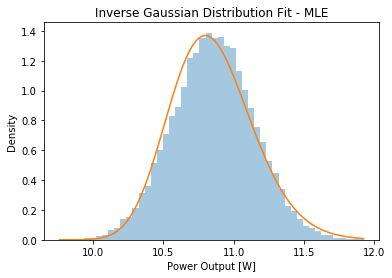

In [16]:
invgauss_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.invgauss.pdf(simulation, *params_invgauss))
invgauss_fit.set_title('Inverse Gaussian Distribution Fit - MLE')
invgauss_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Invgauss.png')

**Normal plot**

In [17]:
type(params_normal)

tuple

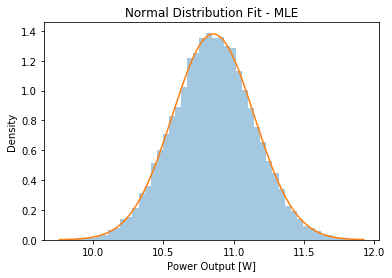

In [18]:
normal_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal))
normal_fit.set_title('Normal Distribution Fit - MLE')
normal_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Normal.png')

z_alpha_2 = 0.4801

mu_sample = params_normal[0]
variance_sample = params_normal[1]**2 / 20000

interval_L = mu_sample - z_alpha_2 * variance_sample
interval_U = mu_sample + z_alpha_2 * variance_sample
params_normal_1 = (interval_L, params_normal[1])
params_normal_2 = (interval_U, params_normal[1])

params_normal_1

scipy.stats.norm.ppf([0.000001, 0.5, 0.999999], *params_normal_1)

best_dist = getattr(scipy.stats, 'norm')
best_params = params_normal

In [ ]:
quantiles = best_dist.ppf([0.000001, 0.5, 0.999999], *best_params)
quantiles_1 = np.zeros(2)
quantiles_1[0] = quantiles[0] - z_alpha_2 * variance_sample
quantiles_1[1] = quantiles[2] + z_alpha_2 * variance_sample
quantiles_1

In [ ]:
quantiles_h = best_dist.ppf([0.00001, 0.5, 0.99999], *best_params)
quantiles_h_1 = np.zeros(2)
quantiles_h_1[0] = quantiles_h[0] - z_alpha_2 * variance_sample
quantiles_h_1[1] = quantiles_h[2] + z_alpha_2 * variance_sample

quantiles_h_1

#(1 -(quantiles_h_1[1]-quantiles_h_1[0])/(limit_MAX - limit_min))*100

In [ ]:
plt.figure(figsize=(10,7))
norm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal))
#plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal_1))
#plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal_2))
plt.axvline(x=limit_min, color='green',label="WCCA")
plt.axvline(x=limit_MAX, color='green')
# Million
plt.axvline(x=quantiles_1[0], color='red', label="Million")
plt.axvline(x=quantiles_1[1], color='red')

# Hundred
plt.axvline(x=quantiles_h_1[0], color='yellow', label="Hundred")
plt.axvline(x=quantiles_h_1[1], color='yellow')

plt.legend()

norm_fit.set_title('Normal Distribution Fit - MLE')
norm_fit.set_ylabel('Density')
plt.savefig('Data/Plots/Quantiles_Normal.png')

quantile_plot = np.zeros(2000)

quantile_plot_min = np.zeros(2000)
quantile_plot_min_min = np.zeros(2000)
quantile_plot_min_max = np.zeros(2000)

quantile_plot_max = np.zeros(2000)
quantile_plot_max_min = np.zeros(2000)
quantile_plot_max_max = np.zeros(2000)

std_sample_loop_array = np.zeros(2000)

indices = np.arange(0,len(y))
random.seed(1234)
random.shuffle(indices)

for i in range(2,len(y)):
    test = y[indices[:i]]
    param = scipy.stats.norm.fit(test)

    # Sample Measures
    std_sample_loop = param[1] / math.sqrt(i)
    std_sample_loop_array[i-2] = z_alpha_2 * std_sample_loop
    
    q_min, q_max = scipy.stats.norm.ppf([0.00001, 0.99999], *param)
    
    # q_min
    quantile_plot_min[i-2] = q_min
    #q_max
    quantile_plot_max[i-2] = q_max
    #q_nominal
    quantile_plot[i-2] = param[0]

    if abs((quantile_plot[i-2] - quantile_plot[i-3])) < 1e-4 and std_sample_loop**2 < 1e-3:
        break

end_loop_index = np.where(quantile_plot_mean==0)[0][0]

i

plt.figure(figsize=(15,10))
plt.plot(quantile_plot[1:end_loop_index], label = 'Quantile')
plt.plot(quantile_plot[1:end_loop_index] - std_sample_loop_array[1:end_loop_index] , label = 'Quantile Min')
plt.plot(quantile_plot[1:end_loop_index] + std_sample_loop_array[1:end_loop_index] , label = 'Quantile MAX')
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(quantile_plot_min[1:end_loop_index], label = 'Quantile')
plt.plot(quantile_plot_min[1:end_loop_index] - std_sample_loop_array[1:end_loop_index] , label = 'Quantile Min')
plt.plot(quantile_plot_min[1:end_loop_index] + std_sample_loop_array[1:end_loop_index] , label = 'Quantile MAX')
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(quantile_plot_max[1:end_loop_index], label = 'Quantile')
plt.plot(quantile_plot_max[1:end_loop_index] - std_sample_loop_array[1:end_loop_index] , label = 'Quantile Min')
plt.plot(quantile_plot_max[1:end_loop_index] + std_sample_loop_array[1:end_loop_index] , label = 'Quantile MAX')
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(quantile_plot_min[1:end_loop_index], label = 'Quantile')
plt.plot(quantile_plot_min_min[1:end_loop_index], label = 'Quantile Min')
plt.plot(quantile_plot_min_max[1:end_loop_index], label = 'Quantile Max')
plt.savefig('Data/Plots/Quantile_min.png')
plt.legend()

plt.figure(figsize=(15,10))
plt.plot(quantile_plot_max[1:end_loop_index], label = 'Quantile')
plt.plot(quantile_plot_max_min[1:end_loop_index], label = 'Quantile Min')
plt.plot(quantile_plot_max_max[1:end_loop_index], label = 'Quantile Max')
plt.savefig('Data/Plots/Quantile_MAX.png')
plt.legend()

np.where(quantile_plot_mean==0)

plt.plot(quantile_plot[1:end_loop_index], label = 'Quantile')
plt.plot(quantile_plot_mean[1:end_loop_index], label = 'Cumulative Quantile Mean')
plt.legend()

**Gamma plot**

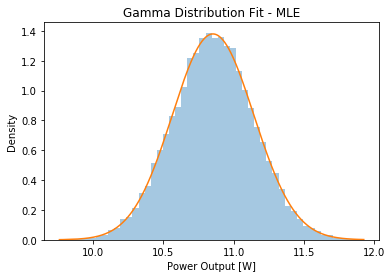

In [19]:
gamma_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.gamma.pdf(simulation, *params_gamma))
gamma_fit.set_title('Gamma Distribution Fit - MLE')
gamma_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Gamma.png')

**Beta plot**

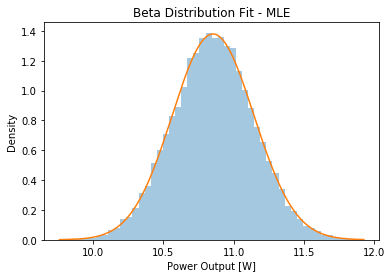

In [20]:
beta_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.beta.pdf(simulation, *params_beta))
beta_fit.set_title('Beta Distribution Fit - MLE')
beta_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Beta.png')

**Lognormal plot**

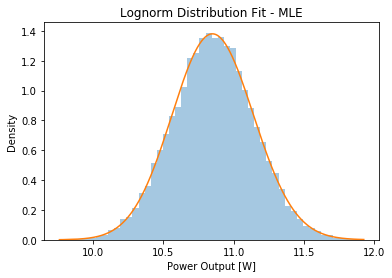

In [21]:
lognorm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.lognorm.pdf(simulation, *params_lognorm))
lognorm_fit.set_title('Lognorm Distribution Fit - MLE')
lognorm_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Lognorm.png')

**Uniform plot**

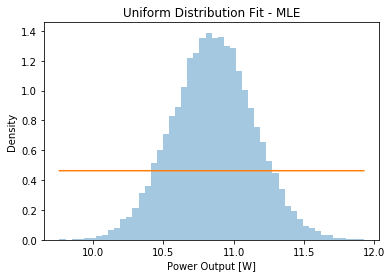

In [22]:
uniform_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.uniform.pdf(simulation, *params_uniform))
uniform_fit.set_title('Uniform Distribution Fit - MLE')
uniform_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MLE_Uniform.png')

**Model A:** Normal Distribution

**Model B:** Beta Distribution

### Non-Nested Likelihood Ratio Test

Compare **Model A** to **Model B** and choose the best fit. 

In [23]:

n_sim = 20000 

In [24]:
#sampling_dist = getattr(scipy.stats, dist_A)
#dataset = sampling_dist.rvs(*param, size = n_sim)
#scipy.stats.lognorm.rvs(*params_lognorm, size = 1000)

In [25]:
from helper_functions import LRT

#Q, Q_array, qQi = LRT(results.iloc[:2], 1000, n_simulation)
if Q < qQi: print('Select model A')

NameError: name 'n_simulation' is not defined

In [ ]:
a = Q_array > Q


print(f"p_value = {p_value}")
print('we fail to reject the null hypothesis')

In [ ]:
#Q, Q_array, qQi = LRT(results.iloc[:2], 100, 10000)

In [ ]:
best_fits = results_test[:4]
best_fits

In [ ]:
best_fits.iloc[0]['Distribution']

In [ ]:
# best fitted distribution information
null = []
alternative = []
p_values = []
for i in range(best_fits.shape[1]):
    for j in range(best_fits.shape[1]):
        if i<j:
            null.append(best_fits.iloc[i]['Distribution'])
            alternative.append(best_fits.iloc[j]['Distribution'])
            p_values.append(LRT(best_fits.iloc[[i, j],:]))

LRT_dataframe = pd.DataFrame()
LRT_dataframe['Null'] = null
LRT_dataframe['Alternative'] = alternative
LRT_dataframe['p_values'] = p_values

In [ ]:
"""
def p_value_LRT(dist_A, dist_B, ...):
    pass
    
def given_df_doit_forany_pair(dataframe, ...):
    pass
"""

In [ ]:
for dist in best_fits['Distribution']:
    print(dist)

In [ ]:
for row in best_fits.itertuples():
    dist = row[1]
    ll = row[2]
    pars = row[4]
    print(dist, ll, pars)

In [ ]:
test = best_fits.iloc[[0,1],:]


In [ ]:
#p1, p2 = LRT(results.iloc[:2], 100, 10000)

In [ ]:
p2

In [ ]:
def LRT(best_options, n_datasets, n_sim):
    """
    Docs: 
    - best_options: so far is a dataframe
    - n_datasets: number of datasets S to simulate from the best estimate
    - n_sim: how many observations to simulate for each dataset
    """
    # Null Model
    dist_A = getattr(scipy.stats, best_options.iloc[0]['Distribution'])
    ll_A = best_options.iloc[0]['Log_likelihood']
    param = best_options.iloc[0]['Parameters']
    
    # Alternative Model
    dist_B = getattr(scipy.stats, best_options.iloc[1]['Distribution'])
    ll_B = best_options.iloc[1]['Log_likelihood']
    
    # LRT Statistic
    Q = 2 * (ll_B - ll_A)
    
    #P value counter
    p_value_counter = 0
    
    for i in range(n_datasets):
        # Generate dataset
        dataset = dist_A.rvs(*param, size = n_sim)
        
        # Fit models
        param_A_i = dist_A.fit(dataset)
        ll_A_i = np.sum(np.log(dist_A.pdf(dataset, *param_A_i)))

        param_B_i = dist_B.fit(dataset)
        ll_B_i = np.sum(np.log(dist_B.pdf(dataset, *param_B_i)))
        
        # Compute Qi
        Q_i = 2 * (ll_B_i - ll_A_i)
        #Q_array[i] = Q_i 
        
        if Q_i > Q:
            p_value_counter += 1
    
    #Quantile_Q = np.quantile(Q_array, 0.95)
    #p_value_1 = np.sum(Q_array>Q)/n_datasets
    p_value = p_value_counter / n_datasets

    return p_value

In [ ]:
results

In [ ]:
results.index[2]

In [ ]:
# Normal vs.gamma
results_test = results.drop(results.index[1])
results_test

In [ ]:
#Normal MoM
new_row = {'Distribution':'norm', 'Log_likelihood':-3553.577563013328, 'Chi_square':0.376369854
, 'Parameters':(10.855754143885084, 0.289212270506663)}

In [ ]:
results.append(new_row, ignore_index=True)

In [ ]:
results

In [ ]:
# Normal vs. logNormal
results_test = results.drop(results.index[0])
results_test = results_test.drop(results_test.index[0])
results_test

In [ ]:
results_test = results.iloc[0:2].iloc[::-1]
results_test

In [ ]:
results

In [ ]:
# Normal vs. logNormal
results_test = results.drop(results.index[0])
results_test = results_test.drop(results_test.index[1])
results_test

In [ ]:
results

In [ ]:
results_test = results.iloc[0:4]
results_test = results_test.drop(results_test.index[0])
results_test = results_test.drop(results_test.index[0]).iloc[::-1]
results_test

In [ ]:
p_value = LRT(results_test, 1000, 20000)
p_value

### Q-Q Plot

Compare **Model A** to **Model B** on a quantile-quantile plot. 

In [26]:
from helper_functions import qqplot

qqplot(simulation, results)

TypeError: qqplot() missing 3 required positional arguments: 'n_distributions', 'title', and 'name_file'

In [ ]:
results

In [ ]:
test_array = np.zeros((2,4))
l1 = []
l1[0]='hola'
l1

In [22]:
class_distribution = getattr(scipy.stats, results.iloc[0]['Distribution'])
test_array = class_distribution.rvs(*results.iloc[0]['Parameters'], size = 2000)

In [23]:
test_array = np.zeros((2,51))

In [24]:
percentile_bins = np.linspace(0,100,51)



In [25]:
test_array[0]=np.percentile(simulation, percentile_bins)

In [92]:
def qqplot(data, best_options, n_distributions, title, name_file):
    """
    QQ Plot: Comment this!
    Inputs:
        - data: Simulated data. Values of the Power output.
        - best_options: dataframe with the results of the fit -> columns |Distribution | Parameters |
            * Distribution: string with the name of the fitted distribution
            * Parameters: tuple with the values of the distribution parameters
        - n_distributions: number of distributions desired to be plotted, it should be a number smaller than the number of rows
                           in the 'best_options' dataframe.
        - title: String that will be the title of the plot.
        - name_file: string that will be the name og the saved file. 
    """
    # Cutoffs
    percentile_bins = np.linspace(0,100,51)
    percentile_cutoffs = np.percentile(data, percentile_bins)
    
    # Alocate memory
    percentile_data = np.zeros((n_distributions, 2000))
    data_cutoffs = np.zeros((n_distributions, 51))
    names = []
    min_line = 999999
    MAX_line = -999999
    
    for i in range(n_distributions):
        
        # Distribution Values
        name_dist = best_options.iloc[i]['Distribution']
        names.append(name_dist)
        
        parameters_dist = best_options.iloc[i]['Parameters']
        class_dist = getattr(scipy.stats, name_dist)
        
        percentile_data[i] = class_dist.rvs(*parameters_dist, size = 2000)
        data_cutoffs[i] = np.percentile(percentile_data[i], percentile_bins)
               
        #Plot size
        if math.floor(min(percentile_data[i])) < min_line:
            min_line = math.floor(min(percentile_data[i]))
        if math.ceil(max(percentile_data[i])) > MAX_line:
            MAX_line = math.ceil(max(percentile_data[i]))
    
    min_line = 9.5
    MAX_line = 12.5
    #Plot
    f, ax = plt.subplots(2,2,figsize=(12,12))
    colors = ['orange', 'blue', 'green', 'yellow', 'red', 'pink']
    indexes = [(0,0),(0,1),(1,0),(1,1)]
    for i in range(n_distributions):
        ax[indexes[i]].plot([min_line, MAX_line], [min_line, MAX_line], ls="--", c=".3")
        ax[indexes[i]].scatter(percentile_cutoffs, data_cutoffs[i], c=colors[i], label = names[i] + ' Distribution', s = 40)
        ax[indexes[i]].legend()

    f.suptitle(title, fontsize=15, y=0.93)
    f.text(0.5, 0.07, 'Theoretical cumulative distribution', ha='center', fontsize = 13)
    f.text(0.06, 0.5, 'Observed cumulative distribution', va='center', rotation='vertical', fontsize=13)
    #ax.set_ylabel('Observed cumulative distribution')
    plt.savefig('Data/Plots/'+name_file+".png")
    plt.show()

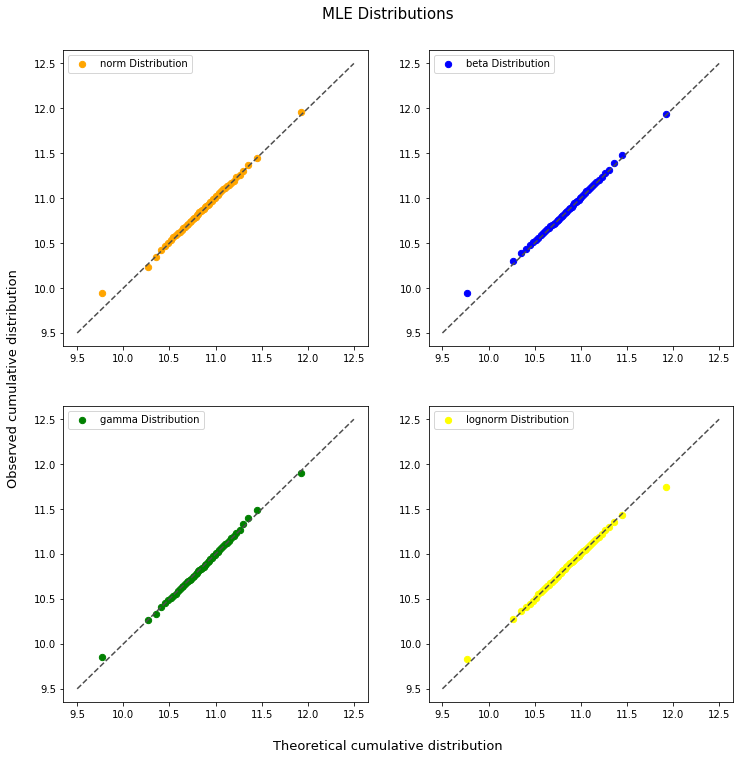

In [93]:
qqplot(simulation, results, 4,"MLE Distributions", "MLE_qq")

In [40]:
indexes = [(0,0),(0,1),(1,0),(1,1)]
for i in range(4):
    print(indexes[i])

(0, 0)
(0, 1)
(1, 0)
(1, 1)


In [8]:
results

,Distribution,Log_likelihood,Chi_square,Parameters
1,norm,-3566.883455,0.376370,"(10.855754143885084, 0.289212270506663)"
3,beta,-3566.513365,0.655257,"(1382.2562704618335, 2140.0620851779486, -2.94..."
6,gamma,-3566.515747,0.664149,"(18158.834821631688, -28.11696932776931, 0.002..."
8,lognorm,-3567.430566,2.107927,"(0.012696297372284948, -11.91493143058753, 22...."
2,weibull_max,-3648.776199,41.664111,"(4.165789169745157, 11.944527058417233, 1.1971..."
0,weibull_min,-3667.089562,60.625129,"(4.209823302146594, 9.752128013554469, 1.21261..."
4,invgauss,-3776.837869,159.350134,"(0.014824681595628057, 8.417802033380093, 164...."
9,pearson3,-6528.510339,3397.475456,"(0.8092113114970197, 10.898386520782875, 0.459..."
10,triang,-6916.007006,4957.499939,"(0.508571469294267, 9.76375419579111, 2.160549..."
5,uniform,-15404.102016,18558.509312,"(9.763923621594225, 2.1602092690086625)"


### Delta Method

In [11]:
data = y

array([[0.]])

In [12]:
from math import erf

In [10]:
def delta_method(x, data):
    sample_mean = np.mean(data)
    sample_variance = np.var(data)
    n = len(data)

    # Covariance matrix
    variance_sample_mean = sample_variance**2/n
    variance_sample_variance = (2*sample_variance**4)/(n-1)
    covariance_matrix = np.array([[variance_sample_mean, 0],[0, variance_sample_variance]])

    # Gradient
    dg_mu = -(scipy.stats.norm.pdf(x, sample_mean, sample_variance**0.5)/(sample_variance**0.5))
    dg_sigma = -((x-sample_mean)/sample_variance) * scipy.stats.norm.pdf(x, sample_mean, sample_variance**0.5)
    gradient = np.array([[dg_mu],[dg_sigma]])

    # Total variance
    variance = np.matmul(np.matmul(np.transpose(gradient),covariance_matrix),gradient)/n
    
    # Total_mean
    mean = 0.5*(1 + erf((x-sample_mean)/(sample_variance**0.5*2**0.5)))
    return mean, variance
    

In [18]:
variance_array = np.zeros(70)
mean_array = np.zeros(70)
for i in range(2,71):
    mean_array[i-1], variance_array[i-1] = delta_method(12.1, y[:i])

In [134]:
variance_array[2:]

array([8.15764800e-20, 2.73535198e-24, 1.76977909e-24, 3.21597000e-22,
       9.87775870e-22, 3.90697906e-19, 4.61457739e-20, 3.67474807e-21,
       4.56864579e-23, 5.71619928e-20, 8.52660026e-21, 4.62967893e-21,
       7.91223032e-21, 4.23151650e-21, 6.33159084e-22, 9.53428445e-20,
       1.13353653e-20, 1.63431872e-17, 2.93625974e-18, 5.21200484e-19,
       6.50600625e-18, 2.39535228e-18, 3.47734301e-18, 5.09762496e-18,
       5.49599249e-18, 2.33896074e-18, 6.56583018e-19, 1.72261721e-18,
       8.47995040e-19, 3.23470400e-19, 1.04142051e-19, 4.93293760e-20,
       3.78943108e-20, 6.03342069e-19, 8.01919538e-19, 7.08135163e-19,
       1.65208131e-18, 1.03039866e-18, 4.89316104e-19, 8.96507412e-19,
       1.36761731e-17, 8.23926158e-18, 1.08436337e-17, 8.84803523e-18,
       8.03073702e-18, 3.41574495e-17, 1.78184321e-17, 9.19572334e-18,
       5.64577724e-18, 6.76347663e-18, 3.63489137e-18, 2.05332338e-18,
       1.18132834e-18, 1.97239110e-18, 1.71502106e-18, 9.97054036e-19,
      

In [19]:
1 - mean_array[2:]

array([1.17311003e-05, 8.98502788e-07, 5.92774474e-07, 1.55962903e-06,
       2.80332192e-06, 1.68995857e-05, 1.19021042e-05, 5.95790116e-06,
       2.14142041e-06, 1.00255205e-05, 5.88696633e-06, 5.71244753e-06,
       5.94166577e-06, 5.63736344e-06, 3.75433056e-06, 1.53718548e-05,
       9.07294563e-06, 4.80910873e-05, 3.18495795e-05, 2.07926008e-05,
       4.39564664e-05, 3.58862791e-05, 4.24951041e-05, 5.02794619e-05,
       5.46649157e-05, 4.61199316e-05, 3.39097419e-05, 4.62344519e-05,
       3.80435588e-05, 2.96943676e-05, 2.28654432e-05, 1.86830255e-05,
       1.83239869e-05, 3.92507572e-05, 4.43070220e-05, 4.48717718e-05,
       5.26904065e-05, 4.84793278e-05, 4.01001870e-05, 4.89110426e-05,
       1.02056526e-04, 9.25639640e-05, 9.58540578e-05, 8.93540977e-05,
       9.02550707e-05, 1.35657280e-04, 1.17095784e-04, 9.99941979e-05,
       9.06259962e-05, 9.81031375e-05, 8.44317835e-05, 7.32626106e-05,
       6.50611956e-05, 7.14237647e-05, 6.78288324e-05, 6.02322517e-05,
      

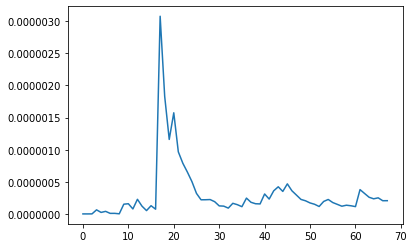

In [120]:
import seaborn as sns
sns.lineplot(data = mean_array[2:])

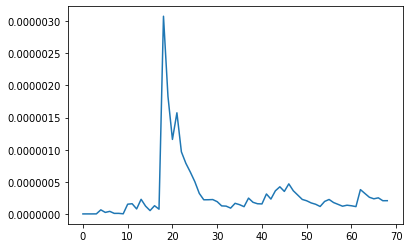

In [121]:
plt.plot(mean_array[1:])

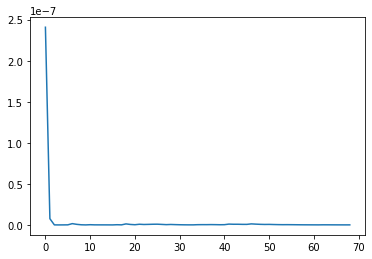

In [113]:
plt.plot(variance_array[1:])

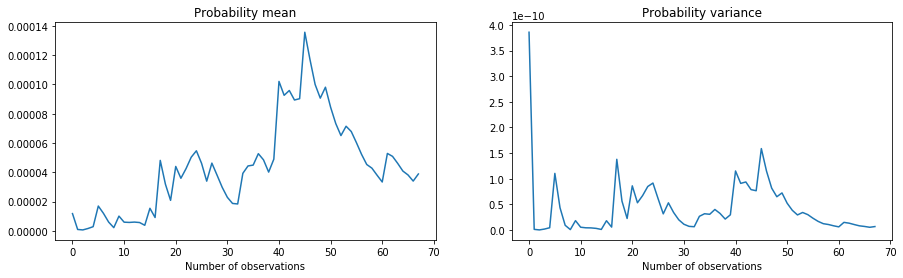

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,4))
ax1.plot(1 - mean_array[2:])
ax1.set_title('Probability mean')
ax1.set_xlabel('Number of observations')
ax2.plot(variance_array[2:])
ax2.set_title('Probability variance')
ax2.set_xlabel('Number of observations')
plt.savefig("Data/Plots/DM_121.png")
plt.show()

### Chosen Model Description

In [28]:
best_name = results.iloc[0]['Distribution']
best_params = results.iloc[0]['Parameters']

best_dist = getattr(scipy.stats, best_name)

## Plot Choosen Model Againts Data

In [29]:
import seaborn as sns

**Simulated Data Histogram**

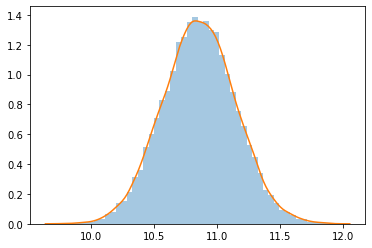

In [30]:
sns.distplot(a = simulation, kde = False, norm_hist=True)
sns.kdeplot(data = simulation, shade= False)

**Chosen Distribution Density Function**

In [31]:
simulation.sort()

**Chosen Distribution on top of Simulated Data Histogram**

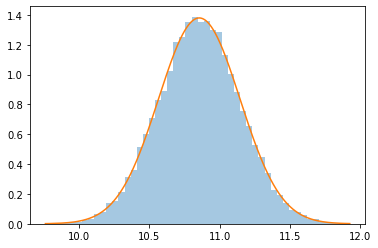

In [32]:
sns.distplot(a = simulation, kde = False, norm_hist=True)
plt.plot(simulation, best_dist.pdf(simulation, *best_params))

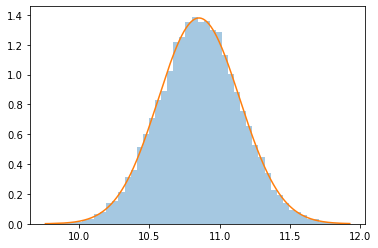

In [33]:
beta_name = results.iloc[1]['Distribution']
beta_params = results.iloc[1]['Parameters']

beta_dist = getattr(scipy.stats, beta_name)

sns.distplot(a = simulation, kde = False, norm_hist=True)
plt.plot(simulation, beta_dist.pdf(simulation, *beta_params))

## Validation Methods

### Kolmogorov-Smirnoff 2 Sample Test

In [34]:
from scipy.stats import ks_2samp

In [35]:
data2 = best_dist.rvs(*best_params, size = 2000)
statistic, pvalue = ks_2samp(data,data2)
print(f"The Statistic value is: {statistic} \nThe p_value is: {pvalue}")

NameError: name 'data' is not defined

In [ ]:
n1 = len(data1)
n2 = len(data2)
alpha = 0.05
c_alpha = 1.36 # https://sparky.rice.edu//astr360/kstest.pdf
critical_value = c_alpha * ((n1 + n2)/(n1*n2))**0.5 
critical_value

In [ ]:
if statistic > critical_value:
    print('The two samples come from different distributions')
else:
    print('The two samples come from same distributions')

## Work Within Limits

### Quantiles

In [ ]:
quantiles = best_dist.ppf([0.000001, 0.5, 0.999999], *best_params)
quantiles[0] = quantiles[0] - 

**Improvement**

In [ ]:
limit_min = model.P_in()[0]
limit_MAX = model.P_in()[2]
limit_nom = model.P_in()[1]
print(f'min: {limit_min}\nMax: {limit_MAX}\n')
(limit_MAX-limit_min)/limit_MAX
percent = ((quantiles[2]-quantiles[0])-(quantiles[2]-quantiles[1]))/limit_MAX*100

print(f'{percent}% narrower')

### Cp

In [ ]:
# Tolerances of electronic components
# Used to initialize the class
from PSU_class import PSU

Vout = np.array([3.2, 3.3, 3.4])
LS_Ron = np.array([6.3, 8.3, 11])*1e-3
Iout = np.array([2.64, 3.03, 3.45])
Vin = np.array([13.3, 13.35, 13.37])
Fsw = np.array([430, 455, 489])*1e3
Vbody_diode = np.array([0.65, 0.8, 1.2])
L = np.array([5.4, 4.5, 3.6])*1e-6
DCR = np.array([12.61, 19, 27.23])*1e-3
P_IC = np.array([83.93, 88.81, 93.69])*1e-3

model = PSU(Vout, LS_Ron, Iout, Vin, Fsw, Vbody_diode, L, DCR, P_IC)

In [ ]:
# This value depends on the best distribution
sigma = best_params[1]

In [ ]:
limit_min = model.P_in()[0]
limit_MAX = model.P_in()[2] 
Cp = (limit_MAX - limit_min)/(6 * sigma)
Cp